# Question: Given that the first card dealt is a defuse card, what is the probability that it is a laser pointer card? Assume that no other card has been drawn and the deck has been properly shuffled.

I plan to conduct an prospective, observational study. The sample space is all defuse cards in a standard deck for the game Exploding Kittens. One trial in this simulation would be drawing a random defuse card from the top of the deck, and the measured outcome would be the type of defuse card drawn.

In [1]:
import random as rd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
df = pd.read_csv("DefuseCardDistribution.csv")

In [12]:
total = df["Count"].sum()
count = df.loc[df["Type"] == "Laser Pointer", "Count"].values[0]
tProb = count / total
print("The theoretical probability of drawing a laser pointer card given that the first card dealt is a defuse card:", tProb)

6
1
The theoretical probability of drawing a laser pointer card given that the first card dealt is a defuse card: 0.16666666666666666


In [18]:
# Expand the deck based on counts
deck = []
numTrials = 250
for _, row in df.iterrows():
    deck.extend([row["Type"]] * row["Count"])

# Run 100 trials (draw with replacement)
trials = [rd.choice(deck) for _ in range(numTrials)]

# Count frequency of each card
trial_counts = Counter(trials)
# Display results
print("Card draw frequencies after", numTrials, "trials:")
for card, freq in trial_counts.items():
    print(f"{card}: {freq}")

frequency1 = trial_counts["Laser Pointer"]
frequency = int(frequency1)
eProb = frequency / numTrials
print("Empirical Probability of drawing an attack card:", eProb)

Card draw frequencies after 250 trials:
Nature Documentaries: 44
Belly Rubs: 43
Laser Pointer: 45
Kitten Therapy: 39
Kitten Yoga: 33
Catnip Sandwich: 46
Empirical Probability of drawing an attack card: 0.18


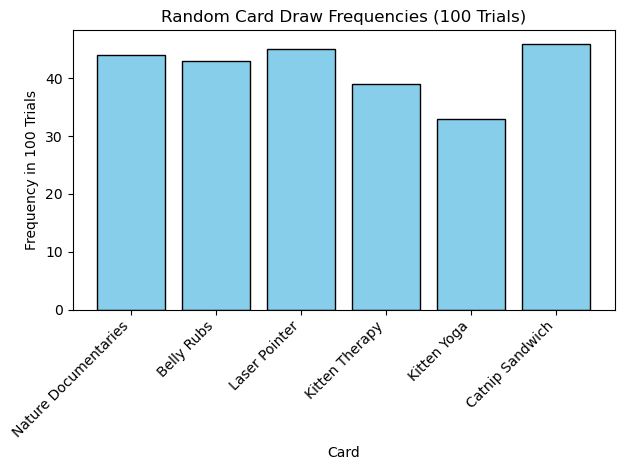

In [19]:
plt.bar(trial_counts.keys(), trial_counts.values(), color='skyblue', edgecolor='black')

# Rotate labels and align them
plt.xticks(rotation=45, ha='right')  # 'right', 'left', or 'center'

plt.xlabel("Card")
plt.ylabel("Frequency in 100 Trials")
plt.title("Random Card Draw Frequencies (100 Trials)")
plt.tight_layout()  # Adjust spacing to prevent clipping
plt.show()

# Answer: The theoretical probability of a laser pointer card being drawn given that the first card drawn is a defuse card is 16.66%, while the empirical probability, collected using 250 trials, is 18%.